# IRIS CLASSIFICATION

### NAME: ALLADI NIKHILA SAREA
### INDIVIDUAL CONTRIBUTION
### PROJECT - 1

### Project Description
The Iris Flower Classification Project is a supervised machine learning model where it focuses on the classification of the three different types of species of flowers - *Setosa*, *Versicolor*, and *Virginica*. These three are differentiated based on their sepal and petal lengths which have been classified in the given data set.
A total of 150 samples have been given in the dataset which are used to train and test the model.
#### Project steps
1. The required libraries are imported along with the dataset
2. Data Visualization is done to understand the relationships between the species
3. Data is then split into *training data (60%)* and *testing data (40%)*.
4. Decision trees and SVM are implemented for the model
5. Model evaluation is performed on the testing data and performance is evaluated from metrics such as *accuracy*, *precision*, *recall*, and *F1-score*.
6. *Confusion Matrix* is visualised using heat map to understand the classification results in detail.
7. Grid search technique is used to find the optimal hyperparameters for the chosen model.

### IMPORT THE NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### LOAD THE DATASET

In [3]:
df = pd.read_csv(r"Iris.csv")

### DATA VISUALISATION 1

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#SHAPE OF THE DATASET
x = df.drop(columns=["Species"])
y = df["Species"]

print(x.shape, y.shape)

(150, 4) (150,)


In [6]:
#DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#NUMBER OF DUPLICATE VALUES
dup = df[df.duplicated()]
print("Duplicates: ")
print(dup)
duplicate = df.duplicated().sum()
print(f" The number of duplicate values are: {duplicate}")

#CREATE A NEW DATASET REMOVING THE DUPLICATE VALUES
df_new = df.drop_duplicates()
duplicate1 = df_new.duplicated().sum()
print(f" The final number of duplicate values are: {duplicate1}")

Duplicates: 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica
 The number of duplicate values are: 3
 The final number of duplicate values are: 0


In [8]:
#NUMBER OF NULL VALUES
null = df.isnull().sum()
print(f" The number of null values are:")
null

 The number of null values are:


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#SHAPE OF THE NEW DATASET
x_new = df_new.drop(columns=["Species"])
y_new = df_new["Species"]

print(x_new.shape, y_new.shape)

(147, 4) (147,)


In [10]:
#COLUMNS
df_new.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
#OVERALL DESCRIPTION OF THE DATASET
df_new.describe(include = 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,147.000000,147.000000,147.000000,147.000000,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.856463,3.055782,3.780272,1.208844,NaN
std,0.829100,0.437009,1.759111,0.757874,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#### SUMMARY
1. The dataset contains a list of different species of Iris Flowers diffrentiated from the length and width of the petals and sepals.
2. The initial shape of the dataset is (150, 5).
3. There are 3 duplicates found in the dataset.
4. The final dataset after removing duplicates consists of 147 rows and 5 columns.
5. The final duplicate values and null values are 0.

### DATA VISUALISATION 2

#### COUNTPLOT OF THE SPECIES

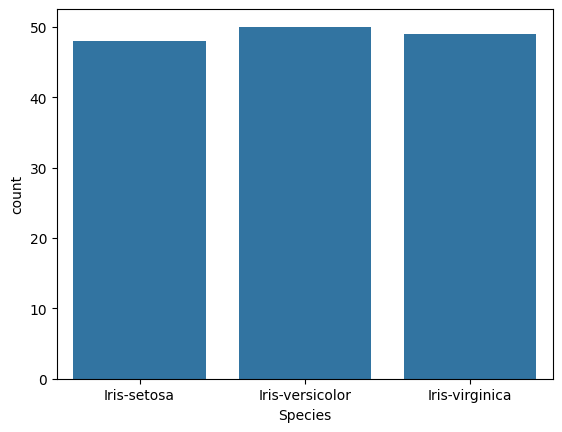

In [12]:
sns.countplot(x = 'Species', data = df_new)
plt.show()

#### SCATTER PLOTS

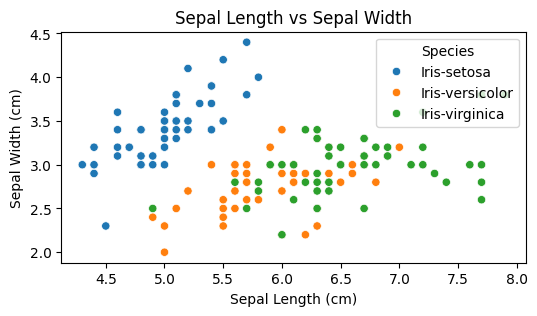

In [13]:
#Sepal Length vs Sepal Width
plt.figure(figsize = (6,3))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df_new)
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

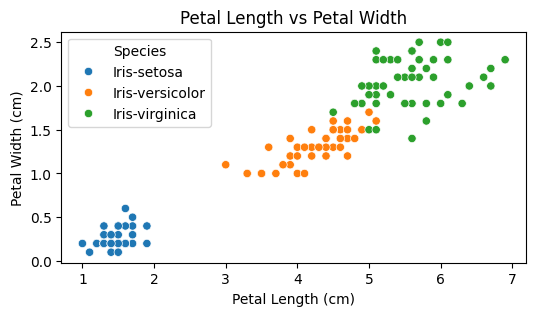

In [14]:
#Petal Length vs Petal Width
plt.figure(figsize = (6,3))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df_new)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

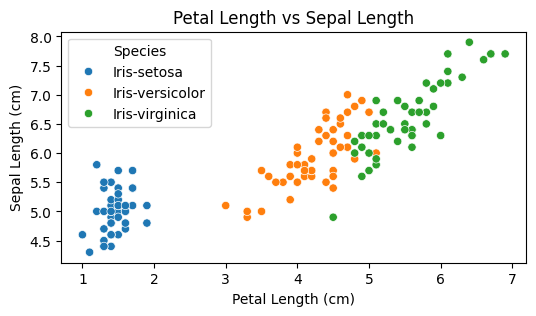

In [15]:
#Petal Length vs Sepal Length
plt.figure(figsize = (6,3))
sns.scatterplot(x='PetalLengthCm', y='SepalLengthCm', hue='Species', data=df_new)
plt.title("Petal Length vs Sepal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Sepal Length (cm)")
plt.show()

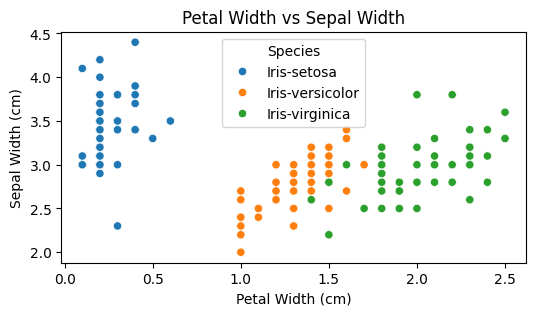

In [16]:
#Petal Width vs Sepal Width
plt.figure(figsize = (6,3))
sns.scatterplot(x='PetalWidthCm', y='SepalWidthCm', hue='Species', data=df_new)
plt.title("Petal Width vs Sepal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

#### HISTOGRAMS OF THE SPECIES - DISTRIBUTION OF THE LENGTHS AND WIDTHS OF THE FLOWER

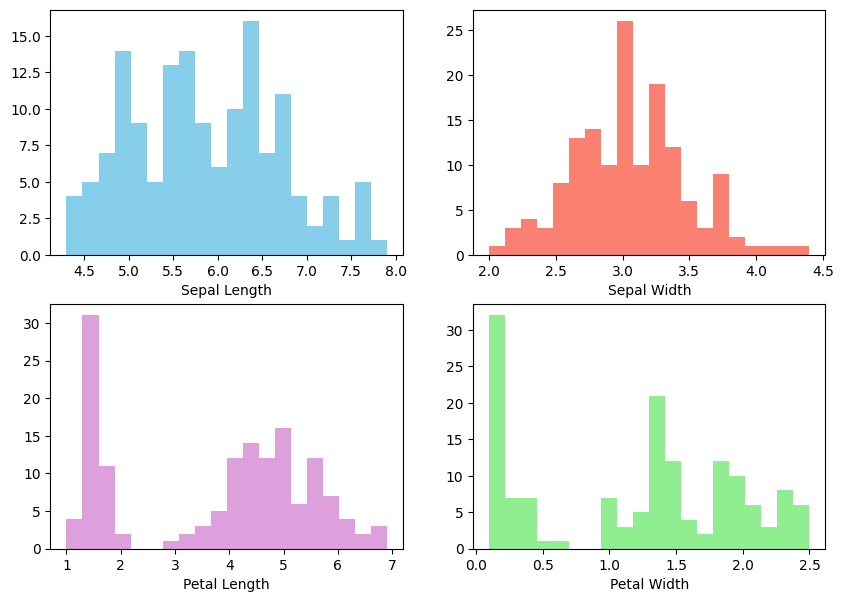

In [17]:
figure, f = plt.subplots(2,2,figsize = (10,7))

f[0,0].hist(df_new['SepalLengthCm'], bins=20, color='skyblue')
f[0,0].set_xlabel("Sepal Length")

f[0,1].hist(df_new['SepalWidthCm'], bins=20, color='salmon')
f[0,1].set_xlabel("Sepal Width")

f[1,0].hist(df_new['PetalLengthCm'], bins=20, color='plum')
f[1,0].set_xlabel("Petal Length")

f[1,1].hist(df_new['PetalWidthCm'], bins=20, color='lightgreen')
f[1,1].set_xlabel("Petal Width")

plt.show()

#### DISTRIBUTION CURVES

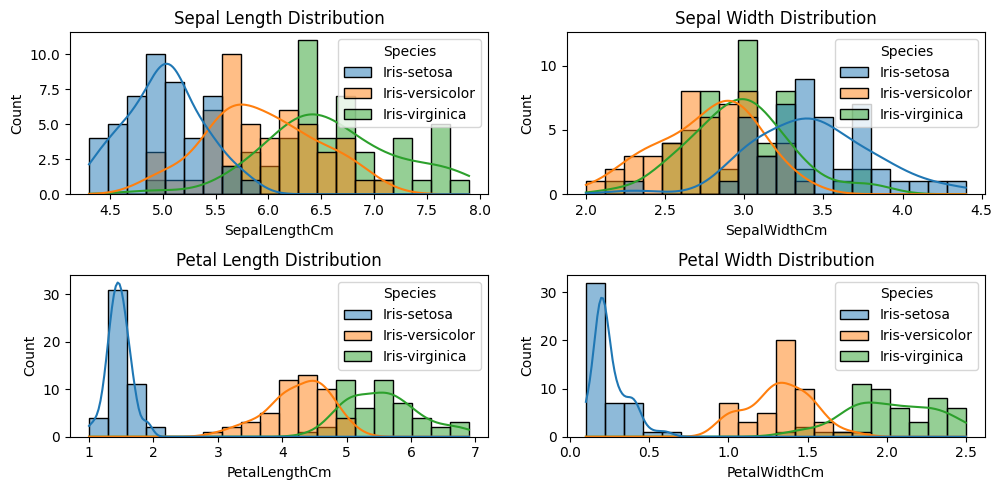

In [18]:
fig, f = plt.subplots(2, 2, figsize=(10,5))

sns.histplot(data=df_new, x="PetalLengthCm", hue="Species", kde=True, bins=20, ax=f[1, 0])
f[1, 0].set_title("Petal Length Distribution")

sns.histplot(data=df_new, x="PetalWidthCm", hue="Species", kde=True, bins=20, ax=f[1, 1])
f[1, 1].set_title("Petal Width Distribution")

sns.histplot(data=df_new, x="SepalLengthCm", hue="Species", kde=True, bins=20, ax=f[0, 0])
f[0, 0].set_title("Sepal Length Distribution")

sns.histplot(data=df_new, x="SepalWidthCm", hue="Species", kde=True, bins=20, ax=f[0, 1])
f[0, 1].set_title("Sepal Width Distribution")

plt.tight_layout()
plt.show()


### DATA PREPROCESSING

In [19]:
#Standardize the features using 'StandardScaler'
x_std = StandardScaler().fit_transform(x_new)
x_std.shape

(147, 4)

In [20]:
#MEAN VECTOR
mean_vec = np.mean(x_std, axis=0)
mean_vec

array([-4.83362405e-17,  1.69176842e-16, -2.41681203e-16, -3.38353684e-16])

In [21]:
#COVARIANCE MATRIX
cov_mat = np.cov(x_std.T)
cov_mat.shape

(4, 4)

In [22]:
#EIGEN VALUES AND VECTORS OF THE COVATIANCE MATRIX
eigen_val,eigen_vec = np.linalg.eig(cov_mat)
print("eigen values: ")
print(eigen_val)
print("eigen vectors: ")
print(eigen_vec)

eigen values: 
[2.92947202 0.92751016 0.14912023 0.02129485]
eigen vectors: 
[[ 0.52230226 -0.37279119 -0.72000204  0.26424259]
 [-0.26361895 -0.92535433  0.2418424  -0.1254459 ]
 [ 0.58130506 -0.02079959  0.13827615 -0.80158063]
 [ 0.56549963 -0.06567705  0.63560131  0.52144767]]


In [23]:
#LIST OF EIGEN VALUES AND EIGEN VECTORS AND SORTING THEM IN DESCENDING ORDER
eig_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
eig_pairs.sort(key = lambda x:x[0] , reverse = True)
print("eigen pairs: ")
eig_pairs

eigen pairs: 


[(np.float64(2.929472022268894),
  array([ 0.52230226, -0.26361895,  0.58130506,  0.56549963])),
 (np.float64(0.9275101577729447),
  array([-0.37279119, -0.92535433, -0.02079959, -0.06567705])),
 (np.float64(0.14912022978813516),
  array([-0.72000204,  0.2418424 ,  0.13827615,  0.63560131])),
 (np.float64(0.02129485044399681),
  array([ 0.26424259, -0.1254459 , -0.80158063,  0.52144767]))]

In [24]:
#Explained Variance and Cummulative Explained Variance
total = sum(eigen_val)
exp_var = [(i/total)*100 for i in sorted(eigen_val, reverse = True)]
cum_exp_var = np.cumsum(exp_var)
cum_exp_var

array([ 72.73859103,  95.76860515,  99.47125031, 100.        ])

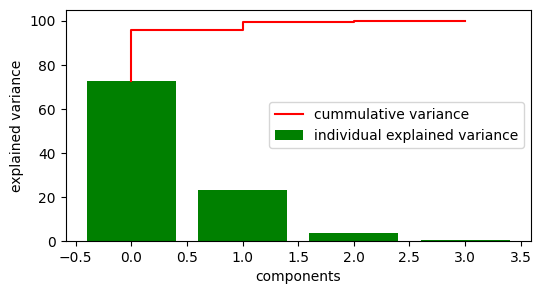

In [25]:
#PLOTTING VARIANCE VS THE COMPONENTS (FOUND ABOVE)
plt.figure(figsize=(6,3))
plt.bar(range(len(exp_var)), exp_var, label='individual explained variance', color='g')
plt.step(range(len(cum_exp_var)), cum_exp_var, label='cummulative variance', color='r')
plt.xlabel('components')
plt.ylabel('explained variance')
plt.legend()
plt.show()

#### GINI IMPURITY

In [26]:
def gini(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("unique Labels: ", unique_labels)
    print("counts: ", counts)
    total = len(labels)
    print("total samples: ", total)

    gini_impurity = 1
    for i in counts:
        prob = i/total
        gini_impurity -= prob**2
    return gini_impurity

gin_imp = gini(y_new)
print("gini impurity: ", gin_imp)

unique Labels:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
counts:  [48 50 49]
total samples:  147
gini impurity:  0.6665741126382527


### SPLIT THE DATA INTO TRAINING SET (60%) AND TESTING SETS (40%)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_std, y_new, test_size=0.2, random_state=42)

### FUNCTION OF CLASSIFICATION MODEL

In [28]:
def classification_model(name,model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)

    print(f"accuracy score for {name} training data: {accuracy_train:.2f}")
    print(f"accuracy score for {name} testing data: {accuracy_test:.2f}")

    print(f"classification report for {name} training set: ")
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    print(classification_report(y_train, y_pred_train))
    print(f"classification report for {name} testing set: ")
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print(classification_report(y_test, y_pred_test))

    con_mat_train = confusion_matrix(y_train, y_pred_train)
    con_mat_test = confusion_matrix(y_test, y_pred_test)

    class_names = y
    le = LabelEncoder()
    le.fit(y)
    class_names_encoded = le.transform(y)
    class_names = le.classes_

    figure, f = plt.subplots(1,2,figsize=(12,4))
    print("Confusion matrix for ",name)

    sns.heatmap(con_mat_train, annot = True, fmt="d", cmap="YlGnBu", xticklabels = class_names, yticklabels = class_names, ax=f[0])
    f[0].set_xlabel("Predicted Class")
    f[0].set_ylabel("True Class")
    f[0].set_title("TRAINING SET")

    sns.heatmap(con_mat_test, annot = True, fmt="d", cmap="YlOrRd", xticklabels = class_names, yticklabels = class_names, ax=f[1])
    f[1].set_xlabel("Predicted Class")
    f[1].set_ylabel("True Class")
    f[1].set_title("TESTING SET")

    plt.tight_layout()
    plt.show()

    precision_train = cr_train['weighted avg']['precision']
    recall_train = cr_train['weighted avg']['recall']
    f1_score_train = cr_train['weighted avg']['f1-score']
    precision_test = cr_test['weighted avg']['precision']
    recall_test = cr_test['weighted avg']['recall']
    f1_score_test = cr_test['weighted avg']['f1-score']

    Metrics = [precision_train, recall_train, f1_score_train, accuracy_train, precision_test, recall_test, f1_score_test, accuracy_test]
    return Metrics

**Creating a dataframe for comparing metrics for different classification models**

In [29]:
Metrics = pd.DataFrame(index = ['precision_train', 'recall_train', 'f1_score_train', 'accuracy_train', 'precision_test', 'recall_test', 'f1_score_test', 'accuracy_test'])

### CLASSIFICATION MODELS

#### Models considered
1. Decision Trees
2. SVM Classifier
3. Random Forest
4. KNN
5. Logistic Regression
#### Hyper parameter tuning
##### Grid Search technique
It provides a systematic and exhaustive approach to hyperparameter tuning. It helps evaluate all possible combinations of predefined parameter values using cross-validation, ensuring that the selected model performs well not just on training data but also on unseen data. It is easy to implement and interpret, Reliable for identifying optimal parameters in a manageable search space. While it can be computationally intensive, the accuracy and consistency it offers for small to medium-sized grids made it the ideal choice for my project.

#### MODEL 1 - DECISION TREES

##### MODEL EVALUATION

accuracy score for decision trees training data: 1.00
accuracy score for decision trees testing data: 0.93
classification report for decision trees training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       117
      macro avg       1.00      1.00      1.00       117
   weighted avg       1.00      1.00      1.00       117

classification report for decision trees testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93

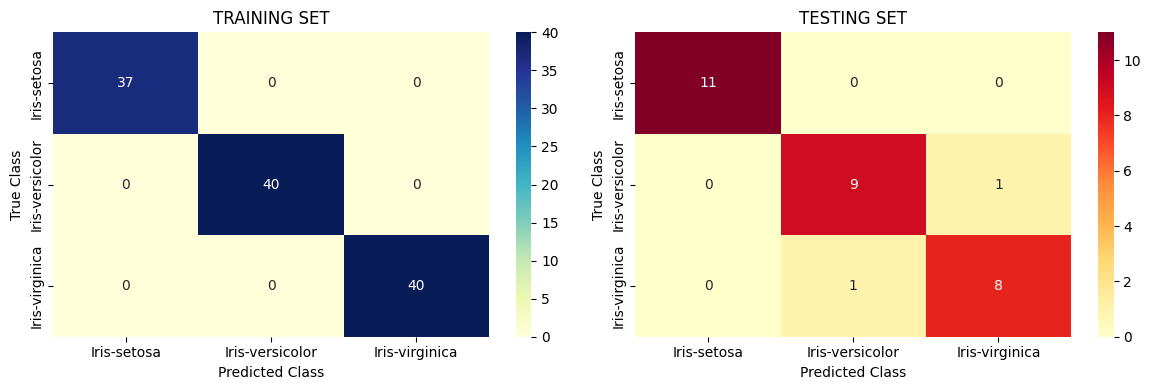

In [30]:
model = DecisionTreeClassifier(random_state=42)
decision_t = classification_model('decision trees',model,x_train,x_test,y_train,y_test)

In [31]:
Metrics['decision trees'] = decision_t
Metrics

,decision trees
precision_train,1.000000
recall_train,1.000000
f1_score_train,1.000000
accuracy_train,1.000000
precision_test,0.933333
recall_test,0.933333
f1_score_test,0.933333
accuracy_test,0.933333


##### HYPERPARAMETER TUNING - GRID SEARCH

Best Parameters for Decision Tree: {'max_depth': np.int64(4), 'max_leaf_nodes': np.int64(5), 'min_samples_leaf': 1}
accuracy score for Parameter Tuned decision trees training data: 0.98
accuracy score for Parameter Tuned decision trees testing data: 0.90
classification report for Parameter Tuned decision trees training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.95      1.00      0.98        40
 Iris-virginica       1.00      0.95      0.97        40

       accuracy                           0.98       117
      macro avg       0.98      0.98      0.98       117
   weighted avg       0.98      0.98      0.98       117

classification report for Parameter Tuned decision trees testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.88  

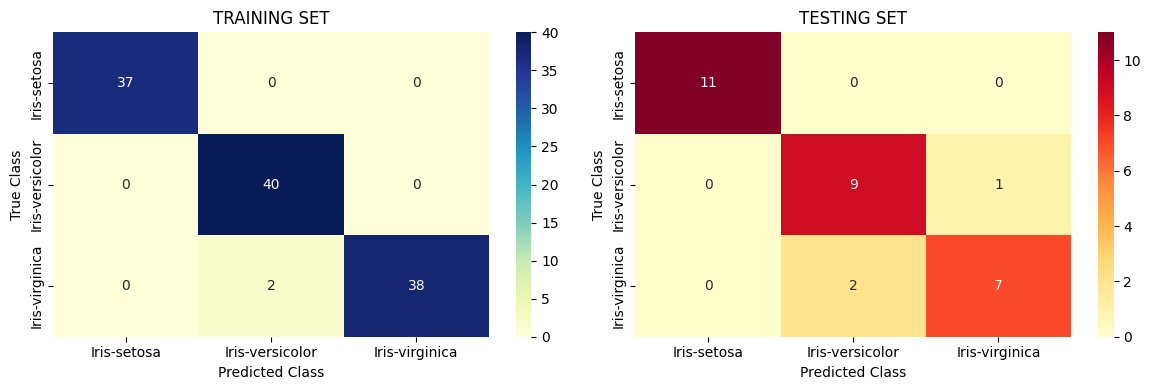

In [32]:
parameters = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': [1, 2, 3],
    'max_leaf_nodes': np.arange(3, 10)
}

# Initialize Decision Tree and GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, parameters, cv=5)
model.fit(x_train, y_train)
print(f"Best Parameters for Decision Tree: {model.best_params_}")

ptdt = classification_model('Parameter Tuned decision trees',model,x_train,x_test,y_train,y_test)


In [33]:
Metrics['Parameter Tuned decision trees'] = ptdt
Metrics

,decision trees,Parameter Tuned decision trees
precision_train,1.000000,0.983720
recall_train,1.000000,0.982906
f1_score_train,1.000000,0.982895
accuracy_train,1.000000,0.982906
precision_test,0.933333,0.901894
recall_test,0.933333,0.900000
f1_score_test,0.933333,0.899440
accuracy_test,0.933333,0.900000


#### MODEL 2 - SVM CLASSIFIER

##### MODEL EVALUATION

accuracy score for SVM training data: 0.97
accuracy score for SVM testing data: 0.97
classification report for SVM training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.95      0.96        40
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       117
      macro avg       0.98      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117

classification report for SVM testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion matrix for  

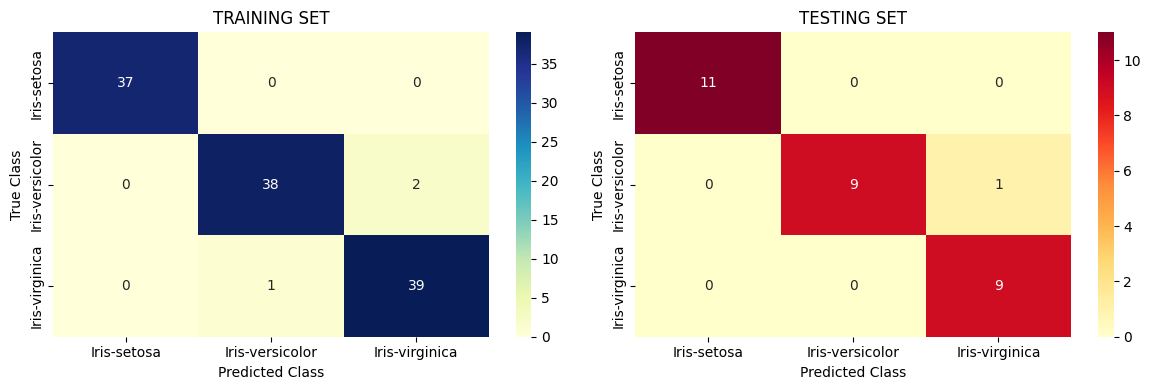

In [34]:
model = SVC(kernel='linear', C=0.2, random_state=42)
svm = classification_model('SVM',model,x_train,x_test,y_train,y_test)

In [35]:
Metrics['SVM'] = svm
Metrics

,decision trees,Parameter Tuned decision trees,SVM
precision_train,1.000000,0.983720,0.974557
recall_train,1.000000,0.982906,0.974359
f1_score_train,1.000000,0.982895,0.974355
accuracy_train,1.000000,0.982906,0.974359
precision_test,0.933333,0.901894,0.970000
recall_test,0.933333,0.900000,0.966667
f1_score_test,0.933333,0.899440,0.966667
accuracy_test,0.933333,0.900000,0.966667


##### HYPERPARAMETER TUNING - GRID SEARCH

accuracy score for Parameter Tuned SVM training data: 0.97
accuracy score for Parameter Tuned SVM testing data: 0.97
classification report for Parameter Tuned SVM training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.95      0.97      0.96        40
 Iris-virginica       0.97      0.95      0.96        40

       accuracy                           0.97       117
      macro avg       0.98      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117

classification report for Parameter Tuned SVM testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg 

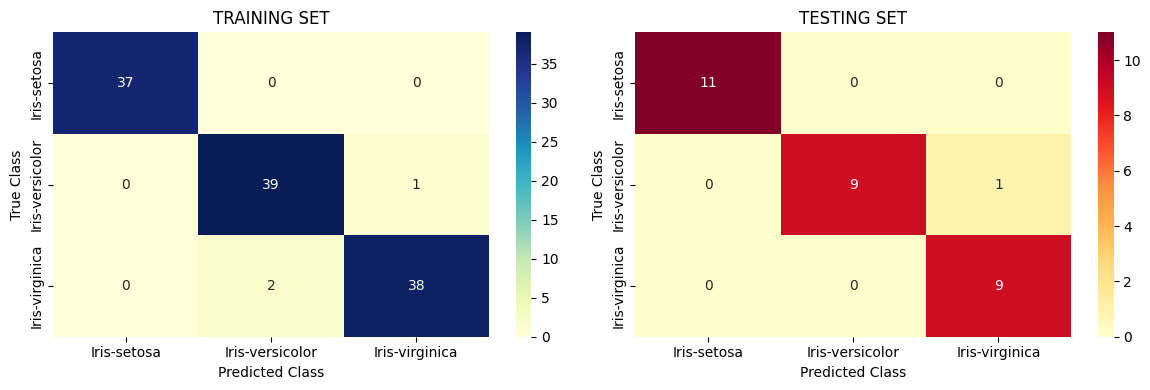

In [36]:
svm_parameters = {
    'C': [0.1, 1, 10, 100],               
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto'],           
    'degree': [2, 3, 4]              
}

svm = SVC()
model = GridSearchCV(svm, svm_parameters, cv=5, n_jobs=-1)

ptsvm = classification_model('Parameter Tuned SVM',model,x_train,x_test,y_train,y_test)

In [37]:
Metrics['Parameter Tuned SVM'] = ptsvm
Metrics

,decision trees,Parameter Tuned decision trees,SVM,Parameter Tuned SVM
precision_train,1.000000,0.983720,0.974557,0.974557
recall_train,1.000000,0.982906,0.974359,0.974359
f1_score_train,1.000000,0.982895,0.974355,0.974355
accuracy_train,1.000000,0.982906,0.974359,0.974359
precision_test,0.933333,0.901894,0.970000,0.970000
recall_test,0.933333,0.900000,0.966667,0.966667
f1_score_test,0.933333,0.899440,0.966667,0.966667
accuracy_test,0.933333,0.900000,0.966667,0.966667


#### MODEL 3 - RANDOM FOREST CLASSIFIER

##### MODEL EVALUATION

accuracy score for Random Forest Classifier training data: 1.00
accuracy score for Random Forest Classifier testing data: 0.93
classification report for Random Forest Classifier training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       117
      macro avg       1.00      1.00      1.00       117
   weighted avg       1.00      1.00      1.00       117

classification report for Random Forest Classifier testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93       

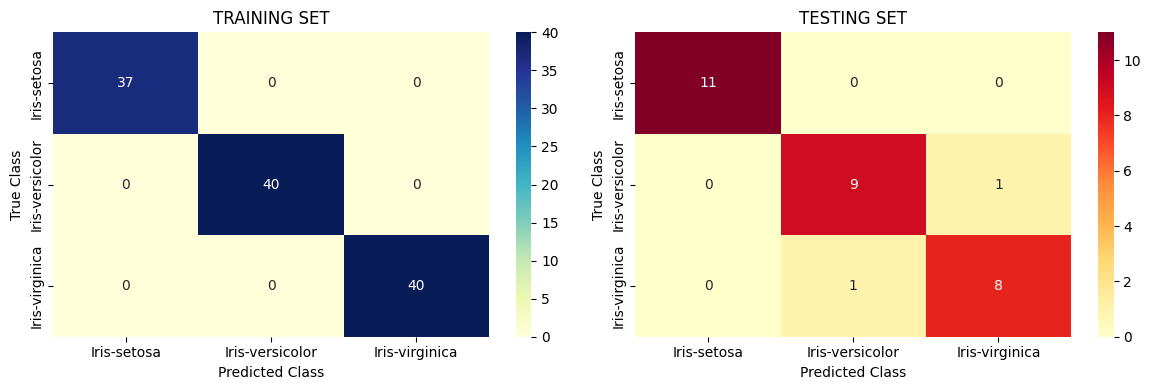

In [38]:
model = RandomForestClassifier(random_state=42)
rfc = classification_model('Random Forest Classifier',model,x_train,x_test,y_train,y_test)

In [39]:
Metrics['Random Forest'] = rfc
Metrics

,decision trees,Parameter Tuned decision trees,SVM,Parameter Tuned SVM,Random Forest
precision_train,1.000000,0.983720,0.974557,0.974557,1.000000
recall_train,1.000000,0.982906,0.974359,0.974359,1.000000
f1_score_train,1.000000,0.982895,0.974355,0.974355,1.000000
accuracy_train,1.000000,0.982906,0.974359,0.974359,1.000000
precision_test,0.933333,0.901894,0.970000,0.970000,0.933333
recall_test,0.933333,0.900000,0.966667,0.966667,0.933333
f1_score_test,0.933333,0.899440,0.966667,0.966667,0.933333
accuracy_test,0.933333,0.900000,0.966667,0.966667,0.933333


##### HYPERPARAMETER TUNING - GRID SEARCH

accuracy score for Parameter Tuned Random Forest Classifier training data: 0.97
accuracy score for Parameter Tuned Random Forest Classifier testing data: 0.90
classification report for Parameter Tuned Random Forest Classifier training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.95      0.97      0.96        40
 Iris-virginica       0.97      0.95      0.96        40

       accuracy                           0.97       117
      macro avg       0.98      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117

classification report for Parameter Tuned Random Forest Classifier testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90

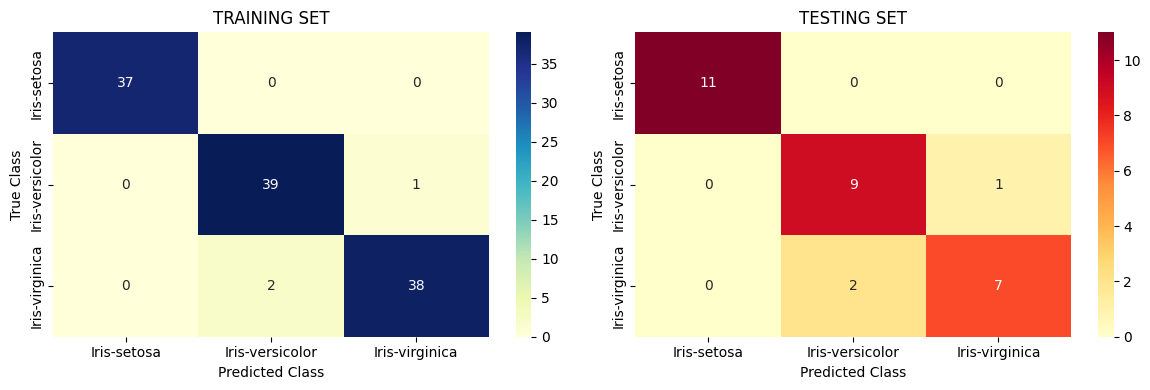

In [40]:
rf_parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': np.arange(2, 10),
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize model and GridSearch
rf = RandomForestClassifier(random_state=42)
model = GridSearchCV(rf, rf_parameters, cv=5, n_jobs=-1)

ptrfc = classification_model('Parameter Tuned Random Forest Classifier',model,x_train,x_test,y_train,y_test)

In [41]:
Metrics['Parameter Tuned Random Forest'] = ptrfc
Metrics

,decision trees,Parameter Tuned decision trees,SVM,Parameter Tuned SVM,Random Forest,Parameter Tuned Random Forest
precision_train,1.000000,0.983720,0.974557,0.974557,1.000000,0.974557
recall_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359
f1_score_train,1.000000,0.982895,0.974355,0.974355,1.000000,0.974355
accuracy_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359
precision_test,0.933333,0.901894,0.970000,0.970000,0.933333,0.901894
recall_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000
f1_score_test,0.933333,0.899440,0.966667,0.966667,0.933333,0.899440
accuracy_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000


#### MODEL 4 - KNN CLASSIFIER

##### MODEL EVALUATION

accuracy score for KNN Classifier training data: 0.97
accuracy score for KNN Classifier testing data: 0.93
classification report for KNN Classifier training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.93      0.97      0.95        40
 Iris-virginica       0.97      0.93      0.95        40

       accuracy                           0.97       117
      macro avg       0.97      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117

classification report for KNN Classifier testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93

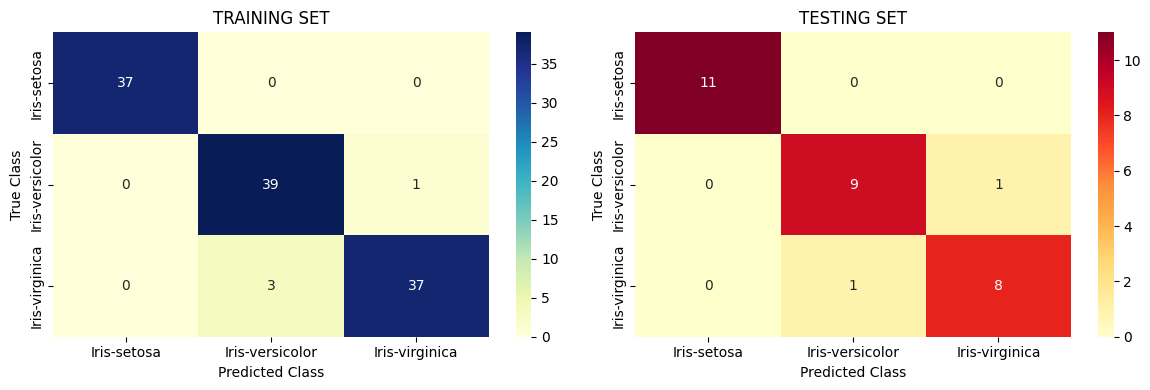

In [42]:
model = KNeighborsClassifier(n_neighbors=5)
knn = classification_model('KNN Classifier',model,x_train,x_test,y_train,y_test)

In [43]:
Metrics['KNN'] = knn
Metrics

,decision trees,Parameter Tuned decision trees,SVM,Parameter Tuned SVM,Random Forest,Parameter Tuned Random Forest,KNN
precision_train,1.000000,0.983720,0.974557,0.974557,1.000000,0.974557,0.966583
recall_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812
f1_score_train,1.000000,0.982895,0.974355,0.974355,1.000000,0.974355,0.965791
accuracy_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812
precision_test,0.933333,0.901894,0.970000,0.970000,0.933333,0.901894,0.933333
recall_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333
f1_score_test,0.933333,0.899440,0.966667,0.966667,0.933333,0.899440,0.933333
accuracy_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333


##### HYPERPARAMETER TUNING - GRID SEARCH

accuracy score for Parameter Tuned KNN Classifier training data: 1.00
accuracy score for Parameter Tuned KNN Classifier testing data: 0.93
classification report for Parameter Tuned KNN Classifier training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       117
      macro avg       1.00      1.00      1.00       117
   weighted avg       1.00      1.00      1.00       117

classification report for Parameter Tuned KNN Classifier testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93   

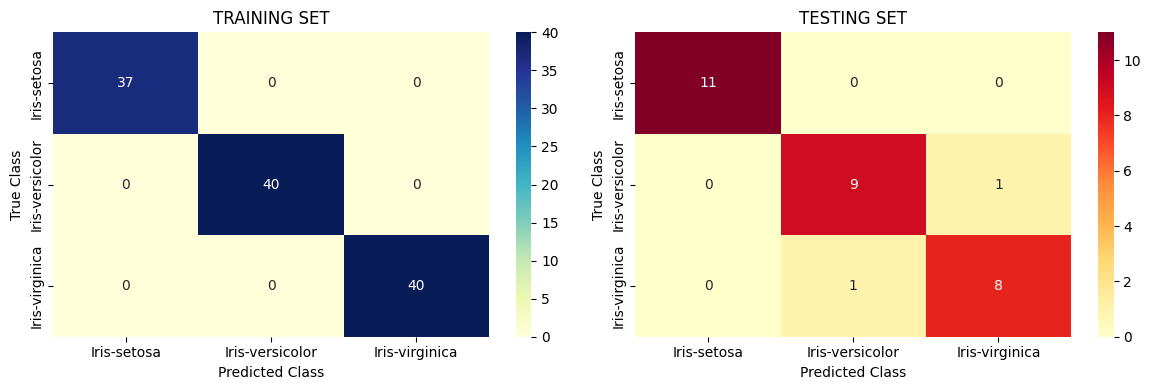

In [44]:
knn_parameters = {
    'n_neighbors': list(range(1, 21)),           # Try k from 1 to 20
    'weights': ['uniform', 'distance'],          # How to weight neighbors
    'metric': ['euclidean', 'manhattan']         # Distance metrics
}

# Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
model = GridSearchCV(knn, knn_parameters, cv=5, n_jobs=-1)

ptknn = classification_model('Parameter Tuned KNN Classifier',model,x_train,x_test,y_train,y_test)

In [45]:
Metrics['Parameter Tuned KNN'] = ptknn
Metrics

,decision trees,Parameter Tuned decision trees,SVM,Parameter Tuned SVM,Random Forest,Parameter Tuned Random Forest,KNN,Parameter Tuned KNN
precision_train,1.000000,0.983720,0.974557,0.974557,1.000000,0.974557,0.966583,1.000000
recall_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812,1.000000
f1_score_train,1.000000,0.982895,0.974355,0.974355,1.000000,0.974355,0.965791,1.000000
accuracy_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812,1.000000
precision_test,0.933333,0.901894,0.970000,0.970000,0.933333,0.901894,0.933333,0.933333
recall_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333,0.933333
f1_score_test,0.933333,0.899440,0.966667,0.966667,0.933333,0.899440,0.933333,0.933333
accuracy_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333,0.933333


#### MODEL 5 - LOGISTIC REGRESSION CLASSIFIER

##### MODEL EVALUATION

accuracy score for Logistic Regression Classifier training data: 0.97
accuracy score for Logistic Regression Classifier testing data: 0.97
classification report for Logistic Regression Classifier training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.95      0.96        40
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       117
      macro avg       0.98      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117

classification report for Logistic Regression Classifier testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97   

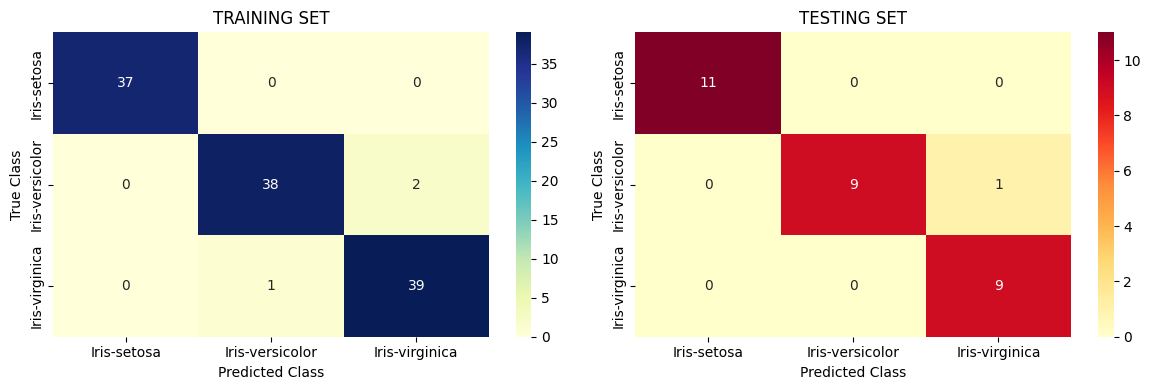

In [46]:
model = LogisticRegression(fit_intercept=True, max_iter=100)
lr = classification_model('Logistic Regression Classifier',model,x_train,x_test,y_train,y_test)

In [47]:
Metrics['Logistic Regression'] = lr
Metrics

,decision trees,Parameter Tuned decision trees,SVM,Parameter Tuned SVM,Random Forest,Parameter Tuned Random Forest,KNN,Parameter Tuned KNN,Logistic Regression
precision_train,1.000000,0.983720,0.974557,0.974557,1.000000,0.974557,0.966583,1.000000,0.974557
recall_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812,1.000000,0.974359
f1_score_train,1.000000,0.982895,0.974355,0.974355,1.000000,0.974355,0.965791,1.000000,0.974355
accuracy_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812,1.000000,0.974359
precision_test,0.933333,0.901894,0.970000,0.970000,0.933333,0.901894,0.933333,0.933333,0.970000
recall_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333,0.933333,0.966667
f1_score_test,0.933333,0.899440,0.966667,0.966667,0.933333,0.899440,0.933333,0.933333,0.966667
accuracy_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333,0.933333,0.966667


##### HYPERPARAMETER TUNING - GRID SEARCH

accuracy score for Parameter Tuned Logistic Regression Classifier training data: 0.97
accuracy score for Parameter Tuned Logistic Regression Classifier testing data: 0.97
classification report for Parameter Tuned Logistic Regression Classifier training set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.95      0.96        40
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       117
      macro avg       0.98      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117

classification report for Parameter Tuned Logistic Regression Classifier testing set: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy       

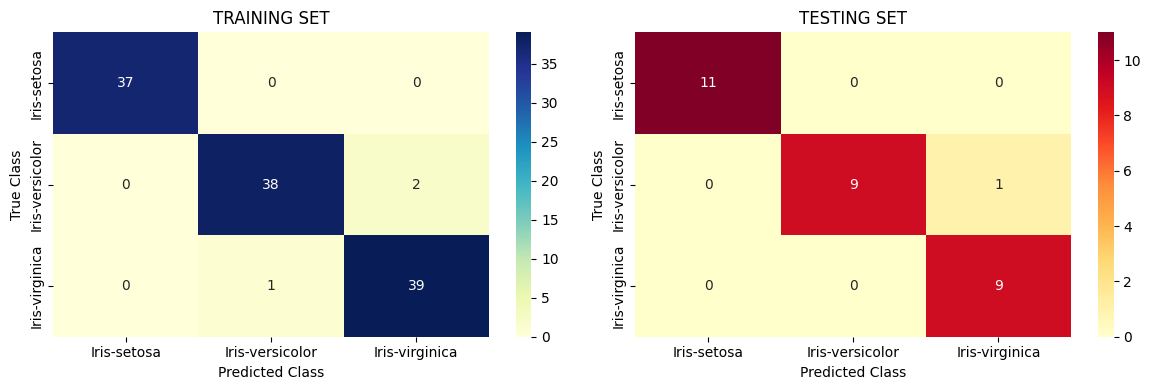

In [48]:
logreg_parameters = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength (inverse)
    'penalty': ['l2'],                         # 'l1' is only supported with saga solver
    'solver': ['lbfgs', 'newton-cg', 'saga'],  # Solvers compatible with 'l2'
    'multi_class': ['auto']                    # Auto-detect (ovr/multinomial)
}

# Initialize and tune Logistic Regression
logreg = LogisticRegression(max_iter=200)
clf_logreg = GridSearchCV(logreg, logreg_parameters, cv=5, n_jobs=-1)

ptlr = classification_model('Parameter Tuned Logistic Regression Classifier',model,x_train,x_test,y_train,y_test)

In [49]:
Metrics['Parameter Tuned Logistic Regression'] = ptlr
Metrics

,decision trees,Parameter Tuned decision trees,SVM,Parameter Tuned SVM,Random Forest,Parameter Tuned Random Forest,KNN,Parameter Tuned KNN,Logistic Regression,Parameter Tuned Logistic Regression
precision_train,1.000000,0.983720,0.974557,0.974557,1.000000,0.974557,0.966583,1.000000,0.974557,0.974557
recall_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812,1.000000,0.974359,0.974359
f1_score_train,1.000000,0.982895,0.974355,0.974355,1.000000,0.974355,0.965791,1.000000,0.974355,0.974355
accuracy_train,1.000000,0.982906,0.974359,0.974359,1.000000,0.974359,0.965812,1.000000,0.974359,0.974359
precision_test,0.933333,0.901894,0.970000,0.970000,0.933333,0.901894,0.933333,0.933333,0.970000,0.970000
recall_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333,0.933333,0.966667,0.966667
f1_score_test,0.933333,0.899440,0.966667,0.966667,0.933333,0.899440,0.933333,0.933333,0.966667,0.966667
accuracy_test,0.933333,0.900000,0.966667,0.966667,0.933333,0.900000,0.933333,0.933333,0.966667,0.966667


### MODEL INTERPRETATION AND INSIGHTS

#### Hyper Parameter Tuning - Improvement?

##### DECISION TREES:
For the decision trees, it seems that the tuning did not improve the performance of the model. The parameters found after tuning appears to be less than the values aprreared before tuning.
##### SVM:
For the svm classification, it seems that the tuning did not improve the performance of teh model either. The parameter values after and before tuning appears to be the same.
##### RANDOM FOREST:
For the decision trees, it seems that the tuning did not improve the performance of the model. The parameters found after tuning appears to be less than the values aprreared before tuning.
##### KNN:
for the knn classification, it appears that the performance of the model has been moderately improved. For the training set data the performance improved but for the testing set data the performance did not improve. The parameter values for the training set appear to have increased after tuning but for testing set, the values remaing the same.
##### LINEAR REGRESSION:
For the linear regression classification, it seems that the tuning did not improve the performance of the model either. The parameter values after and before tuning appears to be the same.

#### BEST MODEL

In [50]:
def best_model(df, metric):
    BModel = {}
    BModel1 = {}

    for i in metric:
        max_value = df[i + '_test'].max()
        BModel1[i] = max_value
        best_m = df[df[i + '_test'] == max_value].index[0]
        model = best_m
        BModel[i] = model
    return BModel, BModel1          

In [51]:
metric = ['precision', 'recall', 'f1_score', 'accuracy']
new = Metrics.iloc[4:]
metric_new = new.transpose()
Metrics1 = metric_new.drop(['Parameter Tuned decision trees', 'Parameter Tuned SVM', 'Parameter Tuned Random Forest', 'Parameter Tuned Logistic Regression'])

bmdf, bmdf1 = best_model(Metrics1, metric)
for i in metric:
    print(f"The best model for {i}: {bmdf[i]} - {bmdf1[i]:.4f}")

The best model for precision: SVM - 0.9700
The best model for recall: SVM - 0.9667
The best model for f1_score: SVM - 0.9667
The best model for accuracy: SVM - 0.9667


### CONCLUSION

The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.This project focused on building and evaluating multiple classification models to identify the most effective algorithm for the given dataset thereby giving the best results inorder to satisfy the aim. The workflow involved essential steps such as data preprocessing, exploratory data analysis, model training, hyperparameter tuning, and performance evaluation.

During the initial phase, the dataset was cleaned by identifying and removing duplicate values to prevent redundancy and improve model generalization. Visualizations such as scatter plots, histograms, and distribution plots provided insights into the feature relationships and class separability.

Several machine learning models were trained, including Decision Trees, K-Nearest Neighbors (KNN), Logistic Regression, Random Forest, and Support Vector Machines (SVM). To ensure optimal performance, GridSearchCV was employed for hyperparameter tuning. This method exhaustively searched through specified parameter combinations using cross-validation, helping prevent overfitting and ensuring that model performance generalized well to unseen data.

Model performance was assessed using four primary metrics:
1. Precision (how many predicted positives are actually positive)
2. Recall (how many actual positives are correctly identified)
3. F1-score (harmonic mean of precision and recall)
4. Accuracy (overall correctness of the model)

The results indicate that the SVM model is not only precise in its predictions but also maintains a strong balance between identifying true positives and minimizing false negatives, making it the most reliable and effective classifier for the given dataset.

SVM was successfully employed in training and testing the dataset and creating a model which classifies the iris flowers with accuracy giving reliable results.